# M2 Car Price Prediction using Linear Regression
Project members: Ning Chu, Sahil Abdulgaffarkhan Pathan and Sohaib Ahmed.

## Objective
* Our objective is to build multiple models and predict car price.

##  Dataset
* The dataset car_price_prediction.csv.gz is from https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge
* So we have copied and shared it over dropbox to read the uncompressed csv file
* 19237 rows x 18 columns (Includes Price Columns as Target)

## Data Lineage
* Our source file is taken directly from Kaggle and copied over drop box as-is.
* Our source of truth is the same single file as dataset. 

## Process
* 1 Data Collected
* 2 Data Explained
* 3 Data Cleaning
* 4 Data Transformation
* 5 Data Modeling
* 6 Prediction
* 7 Model evaluation
* 8 Visulization

###  1 Data Collected

In [0]:
%sh
wget https://www.dropbox.com/s/03pknws5jwu9r8k/car_price_prediction.csv


--2022-12-09 00:48:16--  https://www.dropbox.com/s/03pknws5jwu9r8k/car_price_prediction.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/03pknws5jwu9r8k/car_price_prediction.csv [following]
--2022-12-09 00:48:17--  https://www.dropbox.com/s/raw/03pknws5jwu9r8k/car_price_prediction.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb695218c0ef2e1ee4d30f2243d.dl.dropboxusercontent.com/cd/0/inline/ByRzvFllM4Hrazp7cjLrff6nHFl6ker0KPWjM47Dz3a-0NttftmgMnuptwPZX4xKQdhVdm9mRa4MdcBo4bgjqEsE81UvUUcpXG2Qo8TQm5rBCcuOrLRbc55ypcM_PC7T3IbruEwZuCY2zFdUpbwXRw4Q0FDn12-jyPO_VMtZ_ewV1g/file# [following]
--2022-12-09 00:48:17--  https://ucb695218c0ef2e1ee4d30f2243d.dl.dropboxusercontent.com/cd/0/inline/ByRzvFllM4Hrazp7cjLrff6nHFl6ker0KPWjM47Dz3a-

In [0]:
%sh 
ls -lt


total 3460
-rw-r--r-- 1 root root 2201879 Dec  9 00:48 car_price_prediction.csv
drwxr-xr-x 5 root root    4096 Dec  9 00:48 metastore_db
drwxr-xr-x 2 root root    4096 Dec  9 00:45 ganglia
drwxr-xr-x 2 root root    4096 Dec  9 00:42 logs
drwxr-xr-x 3 root root    4096 Dec  9 00:42 eventlogs
drwxr-xr-x 2 root root    4096 Jan  1  1970 azure
drwxr-xr-x 2 root root    4096 Jan  1  1970 conf
-r-xr-xr-x 1 root root    3037 Jan  1  1970 hadoop_accessed_config.lst
-r-xr-xr-x 1 root root 1307454 Jan  1  1970 preload_class.lst


In [0]:
df1 = spark.read.csv('file:/databricks/driver/car_price_prediction.csv', inferSchema=True, header=True, mode='DROPMALFORMED')
df1.dtypes

Out[3]: [('ID', 'int'),
 ('Price', 'int'),
 ('Levy', 'string'),
 ('Manufacturer', 'string'),
 ('Model', 'string'),
 ('Prod. year', 'int'),
 ('Category', 'string'),
 ('Leather interior', 'string'),
 ('Fuel type', 'string'),
 ('Engine volume', 'string'),
 ('Mileage', 'string'),
 ('Cylinders', 'double'),
 ('Gear box type', 'string'),
 ('Drive wheels', 'string'),
 ('Doors', 'string'),
 ('Wheel', 'string'),
 ('Color', 'string'),
 ('Airbags', 'int')]

In [0]:
display(df1)

ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


## 2 Data Explained

## Key Fields from data set
* Key fields are: 
  'Levy', 'Prod_year', 'Engine_volume', 'Cylinders', 'Airbags','Gear_Box_Type','Drive_Wheels'
  
* Predictor: Price

## Data Summary

In [0]:
print (df1.count())

19237


In [0]:
display(df1.summary())

summary,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
mean,4.5576535886104904E7,18555.92722357956,906.8381278879118,null,7.6479076479076955E59,2010.9128242449447,null,null,null,2.3129897145498557,null,4.582991110880075,null,null,null,null,null,6.582627228777876
stddev,936591.4227992416,190581.2696840091,461.8670512391312,null,2.013303517453604E61,5.668672994387589,null,null,null,0.8881563616553517,null,1.1999331679654888,null,null,null,null,null,4.32016839492205
min,20746880,1,-,ACURA,"""FIT """"S""""- PAKETI.""",1939,Cabriolet,No,CNG,0,0 km,1.0,Automatic,4x4,02-Mar,Left wheel,Beige,0
25%,45698374,5331,640.0,null,325.0,2009,null,null,null,1.8,null,4.0,null,null,null,null,null,4
50%,45772290,13172,781.0,null,500.0,2012,null,null,null,2.0,null,4.0,null,null,null,null,null,6
75%,45802034,22063,1058.0,null,535.0,2015,null,null,null,2.5,null,4.0,null,null,null,null,null,12
max,45816654,26307500,997,სხვა,xD,2020,Universal,Yes,Plug-in Hybrid,7.3,999999999 km,16.0,Variator,Rear,>5,Right-hand drive,Yellow,16


## 3 Cleaning Data

* Rename headers

In [0]:
for col in df1.columns:  # Get rid of dot (.) in column name (causes trouble)
  df1 = df1.withColumnRenamed(col,col.replace(".", ""))
for col in df1.columns:  # Get rid of space in column name (causes trouble)
    df1 = df1.withColumnRenamed(col,col.replace(" ", "_"))



* Remove km from mileage

In [0]:
from pyspark.sql.functions import regexp_replace
df1 = df1.withColumn('Mileage',regexp_replace(df1.Mileage,'km',''))

* Type casting features

In [0]:
df1 = df1.withColumn('Price',df1['Price'].cast("double"))  
df1 = df1.withColumn('Levy',df1['Levy'].cast("double")) 
df1 = df1.withColumn('Prod_year',df1['Prod_year'].cast("double")) 
df1 = df1.withColumn('Engine_volume',df1['Engine_volume'].cast("double")) 
df1 = df1.withColumn('Cylinders',df1['Cylinders'].cast("double")) 
df1.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Price: double (nullable = true)
 |-- Levy: double (nullable = true)
 |-- Manufacturer: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Prod_year: double (nullable = true)
 |-- Category: string (nullable = true)
 |-- Leather_interior: string (nullable = true)
 |-- Fuel_type: string (nullable = true)
 |-- Engine_volume: double (nullable = true)
 |-- Mileage: string (nullable = true)
 |-- Cylinders: double (nullable = true)
 |-- Gear_box_type: string (nullable = true)
 |-- Drive_wheels: string (nullable = true)
 |-- Doors: string (nullable = true)
 |-- Wheel: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Airbags: integer (nullable = true)



* Some of the features has null values, so we are dropping such records

In [0]:
df1 = df1.dropna()

In [0]:
print (df1.count())

12638


* Drop duplicates

In [0]:
df1 = df1.drop_duplicates()

In [0]:
print (df1.count())

12460


In [0]:
display(df1.summary())

summary,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
count,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460,12460
mean,4.5679066608748E7,16695.03643659711,908.7930979133226,null,564.1224489795918,2013.1654093097914,null,null,null,2.334149277688544,219907.14462279293,4.51669341894061,null,null,null,null,null,6.774398073836276
stddev,458018.3680103747,18757.606418410458,468.08583082612114,null,368.1223114827566,2.990796963192214,null,null,null,0.8814849801976848,8958022.228560321,1.1159421551855764,null,null,null,null,null,4.483167482065472
min,31756996,1.0,87.0,ACURA,"""FIT """"S""""- PAKETI.""",1992.0,Cabriolet,No,CNG,0.0,0,1.0,Automatic,4x4,02-Mar,Left wheel,Beige,0
25%,45729830,3293.0,640.0,null,328.0,2011.0,null,null,null,1.8,68728.0,4.0,null,null,null,null,null,4
50%,45770826,13065.0,781.0,null,500.0,2013.0,null,null,null,2.0,119718.0,4.0,null,null,null,null,null,4
75%,45803258,22894.0,1058.0,null,550.0,2015.0,null,null,null,2.5,180973.0,4.0,null,null,null,null,null,12
max,45816650,872946.0,11714.0,VOLVO,xD,2020.0,Universal,Yes,Plug-in Hybrid,20.0,999999999,14.0,Variator,Rear,>5,Right-hand drive,Yellow,16


## Check if data is cleaned

In [0]:
import pyspark.sql.functions as F
import pyspark.sql.types as T

def nan_column_count(df):
    return(df.select([F.count(F.when(F.isnan(df[c]), c)).alias(c) for c in df.columns]))
  
def nan_column_count(df):
    return(df.select([F.count(F.when(F.isnan(df[c].cast(T.DoubleType())), c)).alias(c) for c in df.columns]))    

def null_column_count(df):
    return(df.select([F.count(F.when(df[c].isNull(), c)).alias(c) for c in df.columns]))

def empty_string_column_count(df):
    cols = [c[0] for c in df.dtypes if  c[1] == 'string']
    df = df.select(*cols)
    return(df.select([F.count(F.when(F.col(c) == "", c)).alias(c) for c in df.columns]))

def drop_null_columns(df):
    nrows = df.count()
    cols = [col for col in df.columns if df.where(F.col(col).isNull()).count() == nrows]
    df = df.drop(*cols)
    return df

In [0]:
print("Empty strings")
display(empty_string_column_count(df1))
print("Nans")
display(nan_column_count(df1))
print("Nulls")
display(null_column_count(df1))
print()
print()

Empty strings


Manufacturer,Model,Category,Leather_interior,Fuel_type,Mileage,Gear_box_type,Drive_wheels,Doors,Wheel,Color
0,0,0,0,0,0,0,0,0,0,0


Nans


ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nulls


ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4 Data Transformation

* We are selcting 'Levy', 'Prod_year', 'Engine_volume', 'Cylinders', 'Airbags' as features out of 18 variables for simplfied modeling

In [0]:
df = df1.select('Price','Levy', 'Prod_year', 'Engine_volume', 'Cylinders', 'Airbags','Gear_Box_Type','Drive_Wheels')


### View data

In [0]:
display(df)

Price,Levy,Prod_year,Engine_volume,Cylinders,Airbags,Gear_Box_Type,Drive_Wheels
627.0,475.0,2012.0,1.4,4.0,0,Automatic,Front
6586.0,645.0,2011.0,1.8,4.0,0,Automatic,Front
10036.0,891.0,2016.0,2.0,4.0,4,Automatic,Front
46101.0,394.0,2014.0,2.5,4.0,12,Automatic,Front
19281.0,986.0,2010.0,2.4,4.0,4,Automatic,Front
44134.0,730.0,2016.0,1.6,4.0,4,Automatic,Front
25083.0,730.0,2016.0,1.6,4.0,4,Automatic,Front
12858.0,1363.0,2012.0,4.6,8.0,0,Automatic,4x4
30740.0,831.0,2017.0,1.6,4.0,4,Automatic,Front
784.0,394.0,2014.0,2.5,4.0,12,Automatic,Front


* Click on visualization 1 below

In [0]:
display(df1.select('Prod_year').groupBy('Prod_year').count())

Prod_year,count
2010.0,1144
1993.0,2
2001.0,13
1997.0,3
1992.0,1
1995.0,7
2009.0,379
2007.0,153
1996.0,9
2020.0,39


Output can only be rendered in Databricks

We can see the produce year acculumates on 2012 - 2014.

* Click on visualization 1 below

In [0]:
display(df1.select('Cylinders').groupBy('Cylinders').count())

Cylinders,count
8.0,613
7.0,1
1.0,8
4.0,9766
14.0,1
3.0,55
2.0,4
10.0,4
6.0,1937
5.0,58


Output can only be rendered in Databricks

We can see most of car has 4 Cylinders. No huge difference between other number. We should drop this columns

##  5 Modeling

#### Split the data set for training and testing

In [0]:
train_data, test_data  = df.randomSplit([0.6, 0.4], 24)   # proportions [], seed for random

print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 7516
Number of testing records : 4944


## Pipeline with three models

In [0]:
from pyspark.ml.feature import VectorAssembler,RFormula
from pyspark.ml.regression import LinearRegression, GeneralizedLinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml import Pipeline, Model
from pyspark.ml.evaluation import RegressionEvaluator 
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

columns = df.columns

# with RFormula
formula = "{} ~ {}".format("Price", " + ".join(['Levy', 'Prod_year', 'Engine_volume','Airbags','Drive_Wheels','Gear_Box_Type']))
print("Formula : {}".format(formula))
rformula = RFormula(formula = formula)

# Pipeline basic to be shared across model fitting and testing
pipeline = Pipeline(stages=[])  # Must initialize with empty list!

# base pipeline (the processing here should be reused across pipelines)
basePipeline =[rformula]

#############################################################
# Specify Linear Regression model
lr = LinearRegression()
pl_lr = basePipeline + [lr]
pg_lr = ParamGridBuilder()\
          .baseOn({pipeline.stages: pl_lr})\
          .addGrid(lr.regParam,[0.01, .04])\
          .build()
#############################################################
# Specify Random Forrest model
rf = RandomForestRegressor()
pl_rf = basePipeline + [rf]
pg_rf = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_rf})\
      .build()

#############################################################
# Specify Decision Tree model
dt = DecisionTreeRegressor()
pl_dt = basePipeline + [dt]
pg_dt = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_dt})\
      .build()

# One grid from the individual grids
paramGrid = pg_lr + pg_rf + pg_dt

Formula : Price ~ Levy + Prod_year + Engine_volume + Airbags + Drive_Wheels + Gear_Box_Type


## Cross Validator

In [0]:
cv = CrossValidator()\
      .setEstimator(pipeline)\
      .setEvaluator(RegressionEvaluator()\
                       .setMetricName("r2"))\
      .setEstimatorParamMaps(paramGrid)\
      .setNumFolds(2)

cvModel = cv.fit(df)

## Best and Worst Model

In [0]:
import numpy as np
# RegressionEvaluator metric name is r2, so higher is better
# http://gim.unmc.edu/dxtests/roc3.htm
print("Best Model")
print(cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ])
print("Worst Model")
print (cvModel.getEstimatorParamMaps()[ np.argmin(cvModel.avgMetrics) ])

Best Model
{Param(parent='Pipeline_e7b1b32eaef8', name='stages', doc='a list of pipeline stages'): [RFormula_6266abc5cab6, RandomForestRegressor_516457e41fec]}
Worst Model
{Param(parent='Pipeline_e7b1b32eaef8', name='stages', doc='a list of pipeline stages'): [RFormula_6266abc5cab6, LinearRegression_e62319da2f5b], Param(parent='LinearRegression_e62319da2f5b', name='regParam', doc='regularization parameter (>= 0).'): 0.01}


## Model Measures

In [0]:
import re
def paramGrid_model_name(model):
  params = [v for v in model.values() if type(v) is not list]
  name = [v[-1] for v in model.values() if type(v) is list][0]
  name = re.match(r'([a-zA-Z]*)', str(name)).groups()[0]
  return "{}{}".format(name,params)

# Resulting metric and model description
# get the measure from the CrossValidator, cvModel.avgMetrics
# get the model name & params from the paramGrid
# put them together here:
measures = zip(cvModel.avgMetrics, [paramGrid_model_name(m) for m in paramGrid])
metrics,model_names = zip(*measures)

## Plot Model Measures - Visualization

<Figure size 432x288 with 0 Axes>

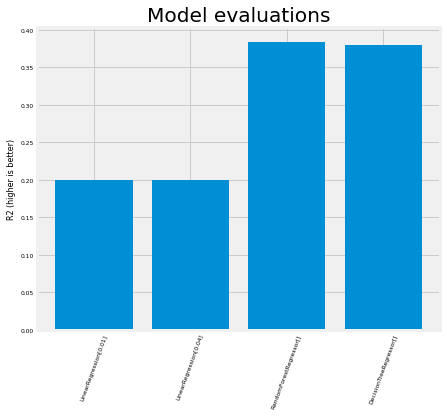

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf() # clear figure
fig = plt.figure( figsize=(7, 7))
plt.style.use('fivethirtyeight')
axis = fig.add_axes([0.1, 0.3, 0.8, 0.6])
# plot the metrics as Y
#plt.plot(range(len(model_names)),metrics)
plt.bar(range(len(model_names)),metrics)
# plot the model name & param as X labels
plt.xticks(range(len(model_names)), model_names, rotation=70, fontsize=6)
plt.yticks(fontsize=6)
#plt.xlabel('model',fontsize=8)
plt.ylabel('R2 (higher is better)',fontsize=8)
plt.title('Model evaluations')
display(plt.show())

## Run best model

In [0]:
## Make predictions on test documents. 
train_data, test_data  = df.randomSplit([0.6, 0.4], 24)   # proportions [], seed for random
# CrossValidator.fit() is in cvModel, which is the best model found.
predictions = cvModel.transform(test_data)
display(predictions.select('label', 'prediction').limit(100))
labeled_predictions = predictions.select('label', 'prediction')

label,prediction
6.0,7682.450502497091
31.0,9833.198226151992
31.0,7088.605770930044
31.0,7088.605770930044
31.0,7088.605770930044
31.0,6217.015885905465
31.0,6217.015885905465
31.0,6217.015885905465
31.0,6217.015885905465
47.0,24669.464787968744


## Evaluate best model

In [0]:
print("Best model", cvModel.bestModel.stages[1])
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("r2: %f" % r2)

Best model RandomForestRegressionModel: uid=RandomForestRegressor_516457e41fec, numTrees=20, numFeatures=9
r2: 0.568140


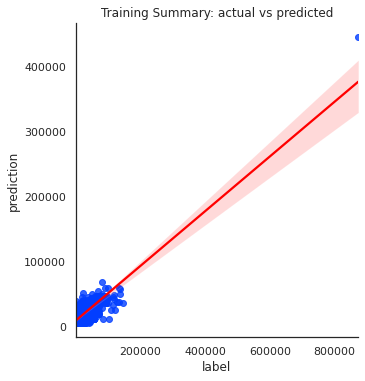

In [0]:
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette("bright")

pdf = labeled_predictions.toPandas()

sns.lmplot(data=pdf, x='label', y='prediction', line_kws={'color': 'red'}, height=5, aspect=1).set(title='Training Summary: actual vs predicted');

## Results Explained

We executed three models to predict car prices. The models were:
* Linear Regression
* Random Forest Regressor
* Decison Tree Regressor

The best model to predict car price was Random Forest as it had the highest r2 score.

## Recommendation

The best model to use for predicting car price is Random Forest Regressor. 

The feautures that produce the best results are:
'Levy', 'Prod_year', 'Engine_volume','Airbags','Drive_Wheels','Gear_Box_Type'